In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/flight_dataset.csv")
df.head()

,Flights,Price,Date
0,Source-Destination,3897,3/2/2068
1,Banglore-New Delhi,7662,3/4/2068
2,Kolkata-Banglore,13882,3/5/2068
3,Delhi-Cochin,6218,3/4/2068
4,Kolkata-Banglore,13302,3/2/2068


In [11]:
#chuyen cot price thanh so
df["Price"]=df["Price"].astype(int)
#chuyen cot date thanh datetime
df["Date"]=pd.to_datetime(df["Date"])

#gia ve trung binh theo tuan
df["Week"]=df["Date"].dt.to_period("W")
weekly_avg=df.groupby("Week")["Price"].mean()

cheapest_route=df.groupby("Flights")["Price"].min()

f"Cheapest ticket:{cheapest_route}"




'Cheapest ticket:Flights\nBanglore-Delhi        1759\nBanglore-New Delhi    1759\nChennai-Kolkata       1965\nDelhi-Cochin          1759\nKolkata-Banglore      1840\nMumbai-Hyderabad      1965\nSource-Destination    3897\nName: Price, dtype: int64'

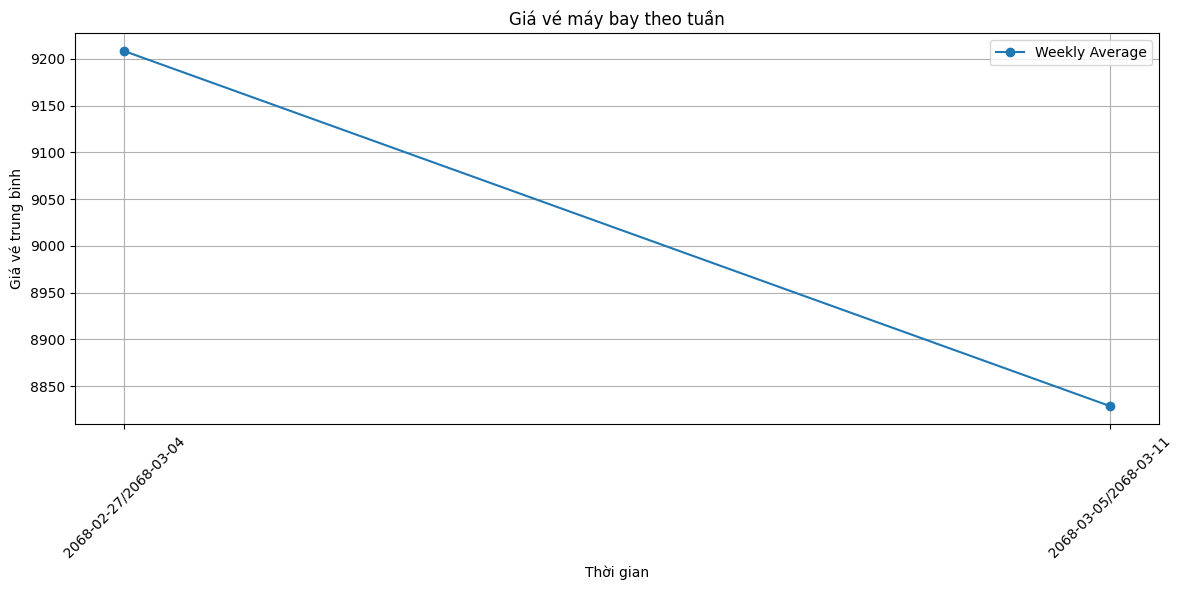

In [13]:
#Visualization
plt.figure(figsize=(12, 6))
plt.plot(weekly_avg.index.astype(str), weekly_avg.values, label='Weekly Average', marker='o')

plt.title('Giá vé máy bay theo tuần')
plt.xlabel('Thời gian')
plt.ylabel('Giá vé trung bình')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

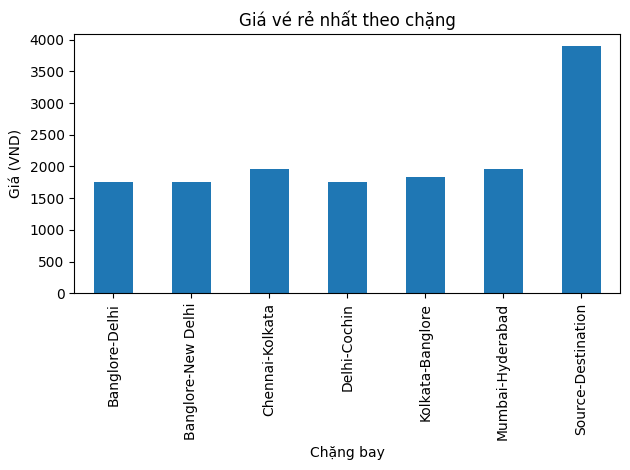

In [14]:
# Biểu đồ giá rẻ nhất theo chặng
cheapest_route.plot(kind='bar', title='Giá vé rẻ nhất theo chặng', ylabel='Giá (VND)', xlabel='Chặng bay')
plt.tight_layout()
plt.show()

In [16]:
# Chuyển đổi Date thành số tuần
df['Date_Numeric'] = df['Date'].dt.strftime('%Y%U').astype(int)

# Chọn biến cho mô hình hồi quy
X = df[['Date_Numeric']]
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá vé trong tương lai
future_weeks = pd.DataFrame({'Date_Numeric': range(df['Date_Numeric'].max(), df['Date_Numeric'].max() + 10)})
predictions = model.predict(future_weeks)
predictions

array([8949.27074632, 8593.31707671, 8237.36340712, 7881.40973751,
       7525.4560679 , 7169.5023983 , 6813.5487287 , 6457.5950591 ,
       6101.64138949, 5745.68771988])